# Stress Analysis

In [16]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
from IPython import get_ipython
import warnings 
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

Dataset

In [2]:
df = pd.read_csv('dreaddit-test.csv')

In [3]:
df.head()

,id,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,896,relationships,7nu7as,"[50, 55]","Its like that, if you want or not.“ ME: I have...",0,0.8,1.514981e+09,22,-1.238793,...,1.0000,1.2000,1.0,1.65864,1.32245,1.80264,0.63,62,-0.148707,0.000000
1,19059,anxiety,680i6d,"(5, 10)",I man the front desk and my title is HR Custom...,0,1.0,1.493348e+09,5,7.684583,...,1.4000,1.1250,1.0,1.69133,1.69180,1.97249,1.00,2,7.398222,-0.065909
2,7977,ptsd,8eeu1t,"(5, 10)",We'd be saving so much money with this new hou...,1,1.0,1.524517e+09,10,2.360408,...,1.1429,1.0000,1.0,1.70974,1.52985,1.86108,1.00,8,3.149288,-0.036818
3,1214,ptsd,8d28vu,"[2, 7]","My ex used to shoot back with ""Do you want me ...",1,0.5,1.524018e+09,5,5.997000,...,1.0000,1.3000,1.0,1.72615,1.52000,1.84909,1.00,7,6.606000,-0.066667
4,1965,relationships,7r1e85,"[23, 28]",I haven’t said anything to him yet because I’m...,0,0.8,1.516200e+09,138,4.649418,...,1.1250,1.1429,1.0,1.75642,1.43582,1.91725,0.84,70,4.801869,0.141667


In [4]:
df.tail()

,id,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
710,24271,ptsd,7vavh4,"(0, 5)",i have horrible vivid nightmares every night. ...,1,1.000000,1.517790e+09,7,4.597368,...,1.000,1.2000,1.0,1.76956,1.46522,1.84112,0.79,15,4.589333,-0.075000
711,2212,relationships,7oeyuc,"[70, 75]",Also I can't think about both of them without ...,1,0.571429,1.515192e+09,0,1.452083,...,1.000,1.1818,1.0,1.67960,1.51429,1.83530,0.50,7,2.833889,0.189286
712,27951,relationships,7ssxec,"(35, 40)","Furthermore, I told him before we got really s...",1,0.600000,1.516849e+09,3,3.956447,...,1.000,1.0000,1.0,1.71367,1.50909,1.85501,0.72,10,5.709053,-0.044444
713,1164,assistance,90bila,"[8, 13]",Here's the link to my amazon wish list where t...,0,0.600000,1.532048e+09,18,0.236814,...,1.500,1.0000,1.0,1.65132,1.53913,1.90766,0.74,2,2.365294,0.090000
714,1519,assistance,7uueuc,"[5, 10]",How can I keep us protected? They have already...,1,0.000000,1.517605e+09,4,3.221250,...,1.125,1.0000,1.0,1.66648,1.52500,1.90820,0.63,8,3.783250,0.136364


In [6]:
df.shape

(715, 116)

In [8]:
df.columns

Index(['id', 'subreddit', 'post_id', 'sentence_range', 'text', 'label',
       'confidence', 'social_timestamp', 'social_karma', 'syntax_ari',
       ...
       'lex_dal_min_pleasantness', 'lex_dal_min_activation',
       'lex_dal_min_imagery', 'lex_dal_avg_activation', 'lex_dal_avg_imagery',
       'lex_dal_avg_pleasantness', 'social_upvote_ratio',
       'social_num_comments', 'syntax_fk_grade', 'sentiment'],
      dtype='object', length=116)

In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

id                          0
subreddit                   0
post_id                     0
sentence_range              0
text                        0
                           ..
lex_dal_avg_pleasantness    0
social_upvote_ratio         0
social_num_comments         0
syntax_fk_grade             0
sentiment                   0
Length: 116, dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 715 entries, 0 to 714
Columns: 116 entries, id to sentiment
dtypes: float64(107), int64(5), object(4)
memory usage: 648.1+ KB


In [13]:
df.describe()

,id,label,confidence,social_timestamp,social_karma,syntax_ari,lex_liwc_WC,lex_liwc_Analytic,lex_liwc_Clout,lex_liwc_Authentic,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
count,715.000000,715.000000,715.000000,7.150000e+02,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,...,715.000000,715.000000,715.00000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000,715.000000
mean,13861.372028,0.516084,0.717895,1.517570e+09,24.627972,4.705624,85.667133,34.743399,38.410839,69.917413,...,1.081046,1.117715,1.00028,1.723382,1.529951,1.878992,0.856294,8.951049,5.497574,0.045345
std,17765.755427,0.500091,0.325688,1.553944e+07,113.086473,3.244652,31.197320,26.331580,30.834289,31.682491,...,0.107884,0.089972,0.00748,0.048894,0.100724,0.056044,0.174352,12.891993,2.490971,0.194114
min,2.000000,0.000000,0.000000,1.483330e+09,0.000000,-4.800000,12.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.574670,1.281480,1.718540,0.200000,0.000000,-2.318095,-1.000000
25%,848.000000,0.000000,0.600000,1.509572e+09,2.000000,2.584422,65.000000,11.975000,10.340000,46.400000,...,1.000000,1.000000,1.00000,1.692570,1.464260,1.841965,0.765000,2.000000,3.693035,-0.056181
50%,1778.000000,1.000000,0.800000,1.516658e+09,5.000000,4.477286,81.000000,30.370000,30.240000,84.470000,...,1.000000,1.125000,1.00000,1.720660,1.523260,1.878170,0.910000,5.000000,5.327778,0.042460
75%,26201.500000,1.000000,1.000000,1.531001e+09,10.000000,6.723889,101.500000,53.480000,61.580000,96.945000,...,1.125000,1.142900,1.00000,1.753110,1.592570,1.910965,1.000000,11.000000,7.049380,0.154701
max,55783.000000,1.000000,1.000000,1.542583e+09,1687.000000,22.535493,264.000000,98.220000,99.000000,99.000000,...,1.777800,1.777800,1.20000,1.946420,2.040000,2.140430,1.000000,128.000000,18.530103,0.800000


Subreddit

In [14]:
df['subreddit'].unique()

array(['relationships', 'anxiety', 'ptsd', 'assistance', 'homeless',
       'almosthomeless', 'domesticviolence', 'survivorsofabuse', 'stress',
       'food_pantry'], dtype=object)

In [15]:
df['subreddit'].value_counts()

anxiety             147
relationships       142
ptsd                127
domesticviolence     72
survivorsofabuse     70
assistance           66
homeless             52
almosthomeless       19
stress               14
food_pantry           6
Name: subreddit, dtype: int64

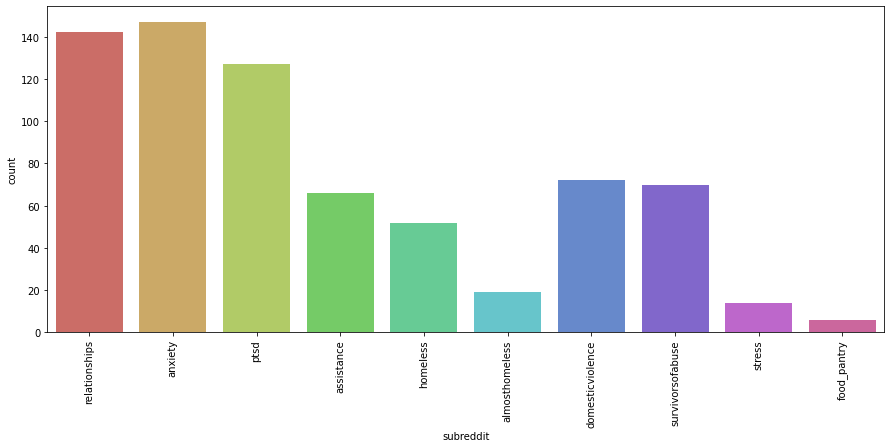

In [18]:
plt.figure(figsize = (15,6))
sns.countplot('subreddit' ,data=df , palette='hls' )
plt.xticks(rotation = 90)
plt.show()

Labels

In [19]:
df['label'].unique()

array([0, 1], dtype=int64)

In [20]:
df['label'].value_counts()

1    369
0    346
Name: label, dtype: int64

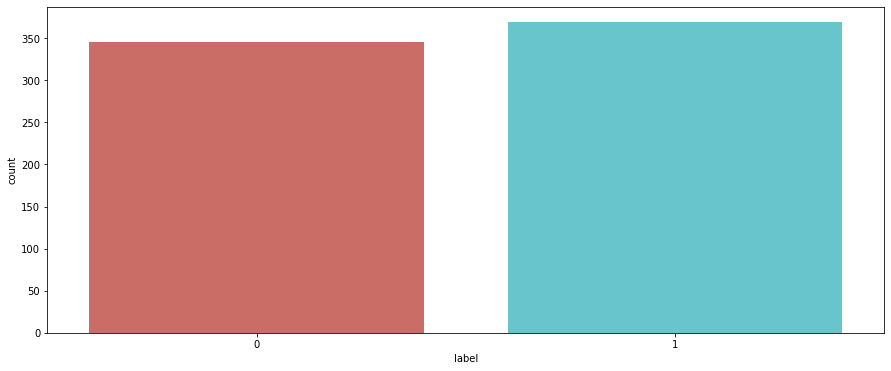

In [21]:
plt.figure(figsize=(15,6))
sns.countplot('label' , data=df , palette='hls')
plt.show()

NLP 

In [26]:
import nltk
import re 
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer("english")
from nltk.corpus import stopwords
import string
stopword = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aniket\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub('https?://\S+|www\.\S+','',text)
    text = re.sub('<.*?>+','',text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text = " ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text = " ".join(text)
    return text

df['text'] = df['text'].apply(clean)

    
    

In [31]:
from wordcloud import  WordCloud, STOPWORDS, ImageColorGenerator
text = " ".join(i for i in df.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopwords , background_color="white").generate(text)


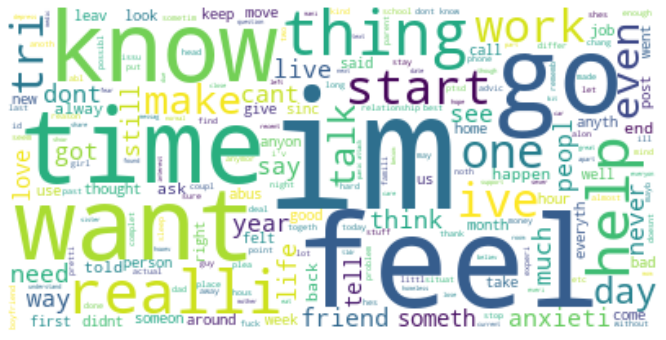

In [32]:
plt.figure(figsize=(15,6))
plt.imshow(wordcloud , interpolation='bilinear')
plt.axis('off')
plt.show()

In [35]:
df['label'] = df['label'].map({0 : 'No Stress' , 1 : 'Stress'})
df = df[['text' , 'label']]
df.head()

,text,label
0,like want not“ problem take longer ask friend ...,No Stress
1,man front desk titl hr custom servic repres j...,No Stress
2,wed save much money new housrit expens citi go...,Stress
3,ex use shoot back want go time matter almost w...,Stress
4,haven't said anyth yet i'm sure someon would t...,No Stress


Training and Testing

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

In [39]:
x = np.array(df['text'])
y = np.array(df['label'])


In [44]:
cv = CountVectorizer()
X = cv.fit_transform(x)
x_train , x_test , y_train , y_test = train_test_split(X,y , test_size=0.25 , random_state=42)

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Logistic Regression

In [46]:
lr = LogisticRegression()
lr.fit(x_train , y_train)

LogisticRegression()

In [47]:
print("Training Score = " , lr.score(x_train,y_train))
print("Testing Score = " , lr.score(x_test,y_test))

Training Score =  1.0
Testing Score =  0.6759776536312849


Decision Tree Classifier

In [48]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [49]:
print("Training Score = " ,dt.score(x_train,y_train))
print("Testing Score = " , dt.score(x_test,y_test))

Training Score =  1.0
Testing Score =  0.5307262569832403


Random Forest Classifier

In [50]:
rf = RandomForestClassifier(n_estimators=10 , criterion='entropy')
rf.fit(x_train , y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [51]:
print("Training Score = " ,rf.score(x_train,y_train))
print("Testing Score = " , rf.score(x_test,y_test))

Training Score =  0.9869402985074627
Testing Score =  0.659217877094972


Analysing

In [57]:
user = input("Enter the text:-  ")
data = cv.transform([user]).toarray()
output = dt.predict(data)
print(output)

Enter the text:-  Happy sadly
['No Stress']
